In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import ReLU
import os,cv2
import json
import glob
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import keras
import h5py
import matplotlib.image as img
%matplotlib inline

In [2]:
!pip install split-folders
import splitfolders
splitfolders.ratio('D:/Project/Classifications/Dataset/', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

Copying files: 742 files [00:00, 1091.18 files/s]


In [3]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Classifications/output/train/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=6
)

Found 592 files belonging to 4 classes.


In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Classifications/output/test/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=6
)

Found 78 files belonging to 4 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Classifications/output/val/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=6
)

Found 72 files belonging to 4 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Animals', 'Bridge', 'Human', 'Nature']


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

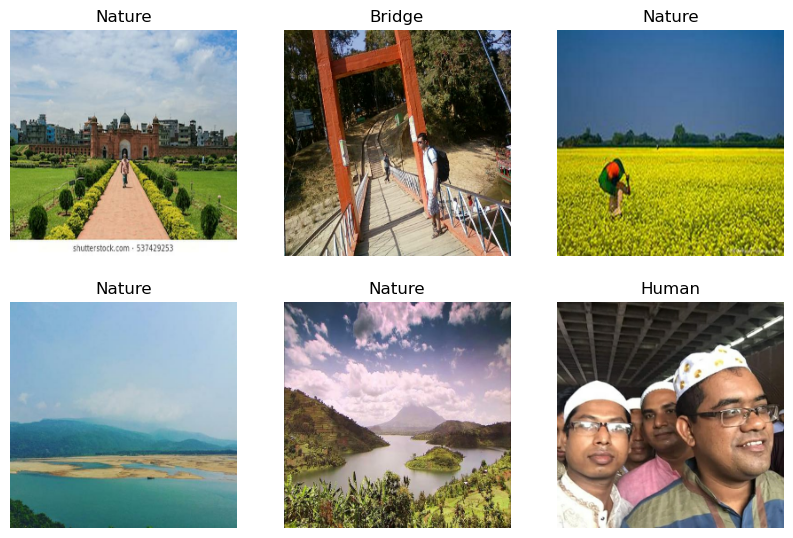

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

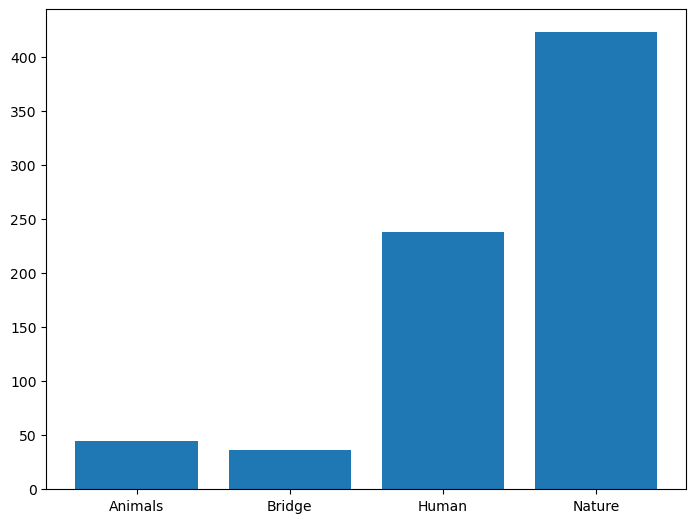

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [45,36,238,423]
ax.bar(class_names,size)
plt.show

In [11]:
model = Sequential([
    keras.layers.Convolution2D(256, 3, activation='relu', padding='same', input_shape=(256,256,3), kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(256, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(128, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(64, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(32, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
    ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 256)     590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        7

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [14]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=6, verbose=1)

Epoch 1/100
99/99 [==============================] - 16s 118ms/step - loss: 20.8869 - accuracy: 0.4814 - val_loss: 1.0555 - val_accuracy: 0.5694
Epoch 2/100
99/99 [==============================] - 7s 73ms/step - loss: 1.1320 - accuracy: 0.5963 - val_loss: 0.7944 - val_accuracy: 0.6944
Epoch 3/100
99/99 [==============================] - 7s 69ms/step - loss: 0.8816 - accuracy: 0.6926 - val_loss: 0.7819 - val_accuracy: 0.6806
Epoch 4/100
99/99 [==============================] - 7s 70ms/step - loss: 0.9063 - accuracy: 0.6588 - val_loss: 0.7704 - val_accuracy: 0.6806
Epoch 5/100
99/99 [==============================] - 7s 70ms/step - loss: 0.8071 - accuracy: 0.6993 - val_loss: 0.6496 - val_accuracy: 0.7778
Epoch 6/100
99/99 [==============================] - 7s 70ms/step - loss: 0.6618 - accuracy: 0.7669 - val_loss: 0.6597 - val_accuracy: 0.7500
Epoch 7/100
99/99 [==============================] - 7s 70ms/step - loss: 0.6603 - accuracy: 0.7736 - val_loss: 0.7028 - val_accuracy: 0.7361
Epo

In [15]:
model.save("model70")
print('Model saved!!')

INFO:tensorflow:Assets written to: model70\assets
Model saved!!


In [16]:
model.save('model.h5')
print('Model saved!!')

Model saved!!


In [17]:
accuracy = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

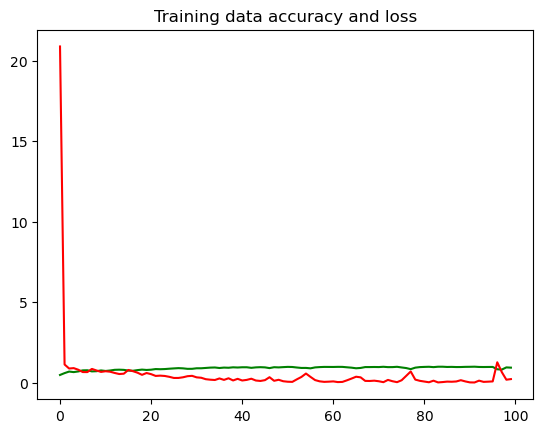

In [18]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Accuracy of training data')
plt.plot(epochs, loss, 'r', label='Loss of training data')
plt.title('Training data accuracy and loss')
plt.savefig('train_acc_loss.png')
plt.show()

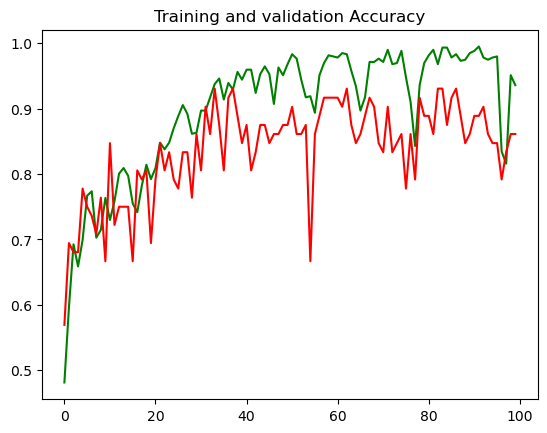

In [19]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Accuracy of training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of validation Data')
plt.title('Training and validation Accuracy')
plt.savefig('test.png')
plt.show()

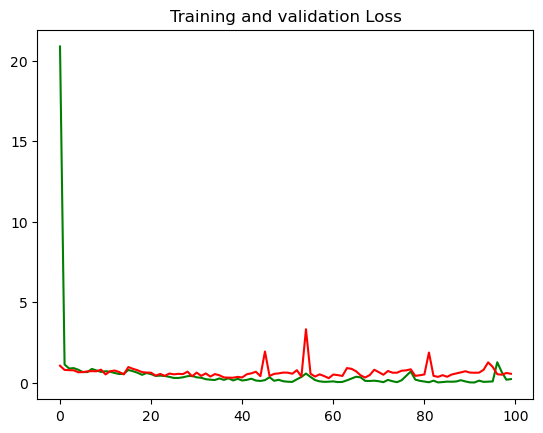

<Figure size 640x480 with 0 Axes>

In [20]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of validation Data')
plt.title('Training and validation Loss')
plt.show()
plt.savefig('test1.png')

In [25]:
loss, accuracy = model.evaluate(test_ds)

3/3 [==============================] - 1s 74ms/step - loss: 0.9816 - accuracy: 0.8590


In [26]:
model.load_weights('D:/Project/Classifications/model.h5')

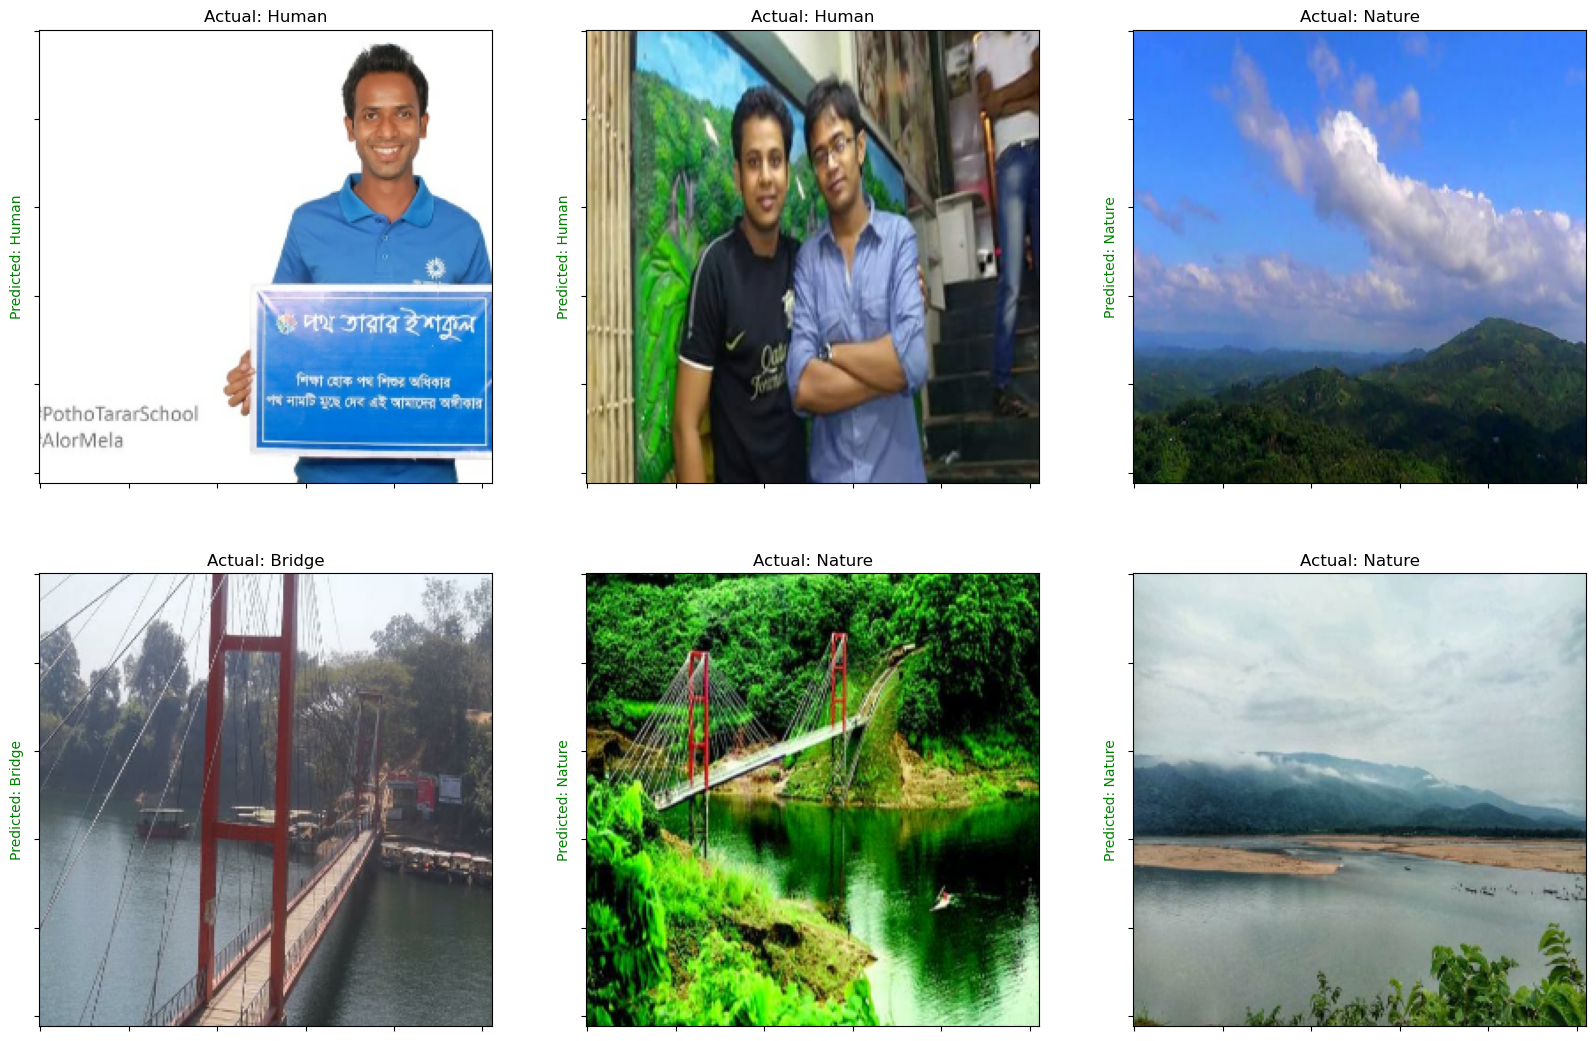

In [31]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

Done